In [1]:
import fastai
from time import sleep
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
from duckduckgo_search import ddg_images

In [2]:
def search_images(term, max=30):
    return L(ddg_images(term, max_results=max)).itemgot('image')

In [3]:
# DOWNLOAD DATASET

searches = ['cats', 'dogs']
path = Path('data/')

def download_dataset():
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents=True)
        
        download_images(dest, urls=search_images(f'{o} photo'))
        sleep(10)
        download_images(dest, urls=search_images(f'{o} sun photo'))
        sleep(10)
        download_images(dest, urls=search_images(f'{o} shade photo'))
        sleep(10)
        resize_images(path/o, max_size=400, dest=path/o)
# download_dataset()

In [4]:
# Remove invalid images

failed = verify_images(get_image_files(path))
failed.map(path.unlink)
len(failed)

0

/var/www/html/faizanhassan/fastai/env/lib/python3.9/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


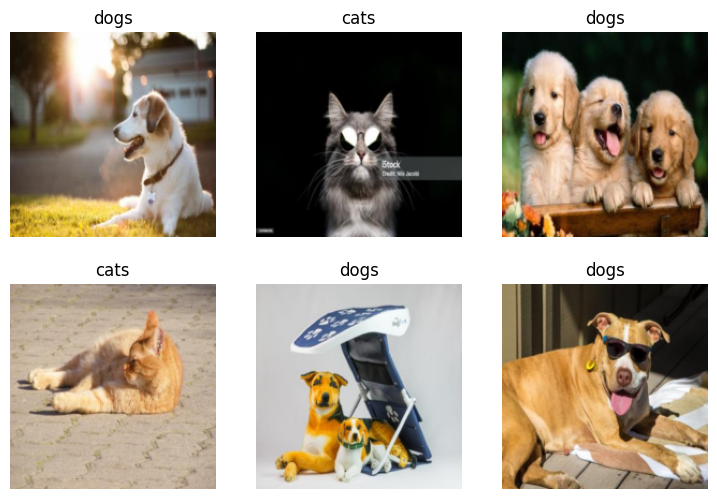

In [5]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [6]:
## Fine Tune on data

# learn = vision_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(3)

## Save the Trained Model
# learn.export('resnet18-cat-or-dog.pkl')

In [7]:
# load model
learn = load_learner('resnet18-cat-or-dog.pkl')

This is a: dogs.
Probability it's a dogs: 0.9991


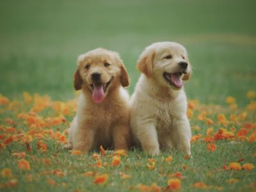

In [16]:
image_path='./test/dog/1.jpg'

# inference
label,_,probs = learn.predict(PILImage.create(image_path))
print(f"This is a: {label}.")
index=0 if label == 'cats' else 1
print(f"Probability it's a {label}: {probs[index]:.4f}")
# print({probs[2]:.4f})

# show image
im = Image.open(image_path)
im.to_thumb(256,256)